(14, 1)


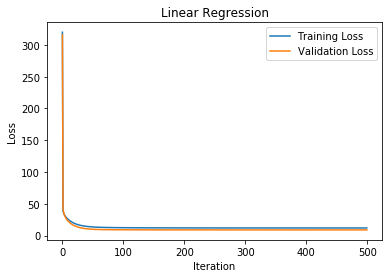

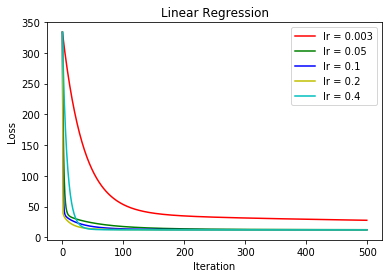

In [36]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

%matplotlib inline

LEARNING_RATE = 0.2
NUM_ITERATIONS = 500
PATH = "./data/housing_scale.txt"

#load data
def get_data(path):
    data = load_svmlight_file(path)
    return data[0],  data[1]

#compute loss
def compute_loss(X,y,W):
    m = X.shape[0]
    pred = np.dot(W,X.transpose())
    diffY = pred-y
    loss = np.dot(diffY,diffY.transpose())/(2*m)
    return loss

#cmpute gradient
def compute_gradient(X,y,initial_W):
    m = X.shape[0]
    W = initial_W
    pred = np.dot(W,X.transpose())
    gradient = np.dot((pred-y),X)/m
    return gradient

def main():
    path = PATH
    X,y = get_data(path)
    X0 = np.ones((len(y),1))
    X = X.todense()
    X = np.column_stack((X0,X))
    #print(X.shape)

    #divide dataset
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3)
    num_features = X_train.shape[1]
    num_train = X_train.shape[0]
    num_validation = X_validation.shape[0]
    #initial W in three ways
    initial_W_zero = np.zeros(num_features)
    initial_W_random = np.random.random(num_features)
    initial_W_normal = np.random.normal(size=num_features)
    
    #perform gradient descent to learn W and update W
    learning_rate = LEARNING_RATE
    num_iterations = NUM_ITERATIONS
    W = initial_W_random
    loss_train = np.zeros(num_iterations)
    loss_validation = np.zeros(num_iterations)

    for i in range(0,num_iterations):
        loss_train[i] = compute_loss(X_train,y_train,W)
        loss_validation[i] = compute_loss(X_validation,y_validation,W)
        #update W
        G = compute_gradient(X_train,y_train,W)
        W = W - learning_rate*G
  
    # plot
    plt.figure(1)
    plt.plot(loss_train,label="Training Loss")
    plt.plot(loss_validation,label="Validation Loss")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Linear Regression")
    
    lr_arr = np.array([0.003,0.05,0.1,0.2,0.4])
    color = np.array(['r','g','b','y','c'])
    num_iterations = NUM_ITERATIONS
    plt.figure(2)
    for j in np.arange(lr_arr.size):
        loss_train = np.zeros(num_iterations)
        W = initial_W_normal
        for i in range(0,num_iterations):
            loss_train[i] = compute_loss(X_train,y_train,W)
            G = compute_gradient(X_train,y_train,W)
            W = W - lr_arr[j]*G
        label = 'lr = ' + str(lr_arr[j])
        plt.plot(loss_train,c=color[j],label=label)
    plt.legend(loc='best')
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Linear Regression")
    plt.show()
    
if __name__ == "__main__":
    main()